Install ahijevyc/MetPy branch parcel_with_virtual_temperature. [link](https://github.com/ahijevyc/MetPy/tree/parcel_with_virtual_temperature)
* handles missing dewpoints (water vapor pressure=0, mixing ratio=0, Tv=T)

In [1]:
import logging

import cm1.input.era5
import cm1.input.sounding
import matplotlib.pyplot as plt
import pandas as pd
from cm1.skewt import skewt
from cm1.utils import TMPDIR
from metpy.units import units

# Configure logging
logging.basicConfig(level=logging.WARNING, format="%(asctime)s - %(levelname)s: %(message)s", force=True)

### Predefined CM1 input soundings

/Users/ahijevyc/sysdisk1/MetPy/src/metpy/calc/thermo.py:1648: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/Users/ahijevyc/sysdisk1/MetPy/src/metpy/calc/thermo.py:1649: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/Users/ahijevyc/sysdisk1/MetPy/src/metpy/calc/thermo.py:1648: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/Users/ahijevyc/sysdisk1/MetPy/src/metpy/calc/thermo.py:1649: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/Users/ahijevyc/sysdisk1/MetPy/src/metpy/calc/thermo.py:1648: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/Users/ahijevyc/sysdisk1/MetPy/src/metpy/calc/thermo.py:1649: RuntimeWarning: invalid value encountered in divi

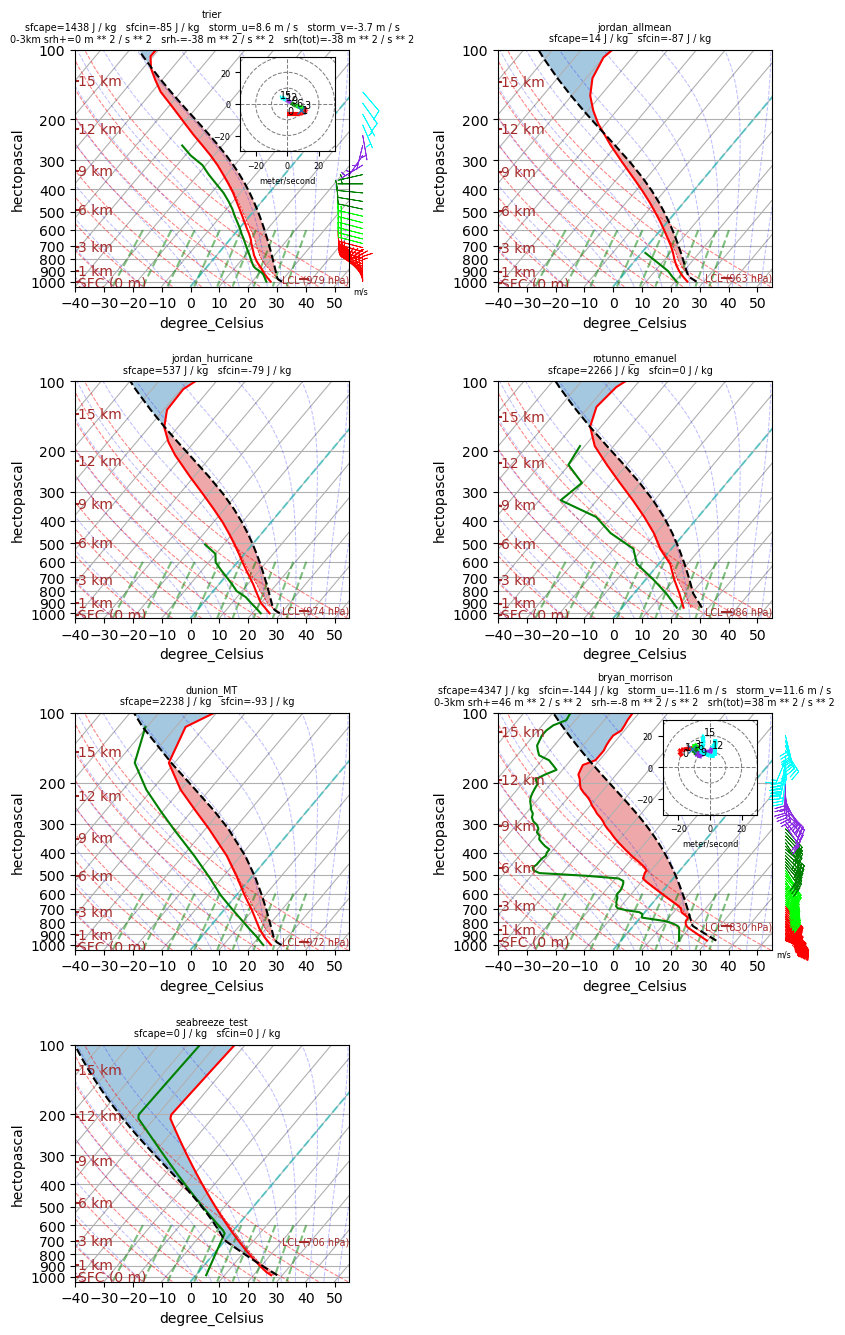

In [2]:
dss = [
    cm1.input.sounding.trier(),
    cm1.input.sounding.jordan_allmean(),
    cm1.input.sounding.jordan_hurricane(),
    cm1.input.sounding.rotunno_emanuel(),
    cm1.input.sounding.dunion_MT(),
    cm1.input.sounding.bryan_morrison(),
    cm1.input.sounding.seabreeze_test(),
]
fig, axes = plt.subplots(
    ncols=2,
    nrows=4,
    sharex=True,
    sharey=True,
    figsize=(10, 16),
    gridspec_kw={"hspace": 0.4},
)
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

for i, ds in enumerate(dss):
    # Use subplot because skewt() uses metpy.plots.SkewT, which uses it.
    logging.info(ds.attrs["case"])
    skew = skewt(ds, fig=fig, subplot=(4, 2, i + 1))
    skew.ax.set_title(
        ds.attrs["case"] + skew.ax.get_title(), fontsize="x-small"
    )  # Set title to sounding case

In [3]:
valid_time = pd.to_datetime("20240525")
lon = -95 * units.degree_E
lat = 33 * units.degree_N
ds_aws = cm1.input.sounding.era5_aws(valid_time, lat, lon)
ds_aws

2025-02-13 11:31:01,276 - WARNING: Found cached s3 133_q.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,277 - WARNING: Found cached s3 130_t.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,277 - WARNING: Found cached s3 131_u.ll025uv 2024-05-25 00:00:00
2025-02-13 11:31:01,277 - WARNING: Found cached s3 132_v.ll025uv 2024-05-25 00:00:00
2025-02-13 11:31:01,278 - WARNING: Found cached s3 135_w.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,278 - WARNING: Found cached s3 129_z.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,357 - WARNING: Found cached s3 134_sp.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,357 - WARNING: Found cached s3 165_10u.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,358 - WARNING: Found cached s3 166_10v.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,358 - WARNING: Found cached s3 167_2t.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,358 - WARNING: Found cached s3 168_2d.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,394 - WARNING: Found cached s3 129_z.l

<xarray.Dataset> Size: 2kB
Dimensions:                        (level: 37)
Coordinates:
    longitude                      float64 8B 265.0
    latitude                       float64 8B 33.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/16)
    Q                              (level) float32 148B <Quantity(dask.array<...
    T                              (level) float32 148B <Quantity(dask.array<...
    U                              (level) float32 148B <Quantity(dask.array<...
    V                              (level) float32 148B <Quantity(dask.array<...
    W                              (level) float32 148B <Quantity(dask.array<...
    Z                              (level) float32 148B <Quantity(dask.array<...
    ...                             ...
    VAR_2T                         float32 4B <Quantity(dask.array<getitem, s...
    VAR_2D                         float32 4B <Quantity(dask.array<getitem, s...
    surface_potential_temperature  float32 4B <Quantity(dask.array<getitem, s...
    surface_mixing_ratio           float32 4B <Quantity(dask.array<getitem, s...
    Zsfc                           float32 4B <Quantity(dask.array<getitem, s...
    LSM                            float32 4B <Quantity(dask.array<getitem, s...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

### Given a latitude and longitude, select the nearest ERA5 grid point and 4 neighbors
* nearest grid point `G`
* `north` neighbor
* `south`
* `west`
* `east`

In [13]:
cm1.input.era5.aws(valid_time)

2025-02-13 11:42:21,911 - WARNING: Found cached s3 133_q.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:21,913 - WARNING: Found cached s3 130_t.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:21,915 - WARNING: Found cached s3 131_u.ll025uv 2024-05-25 00:00:00
2025-02-13 11:42:21,916 - WARNING: Found cached s3 132_v.ll025uv 2024-05-25 00:00:00
2025-02-13 11:42:21,917 - WARNING: Found cached s3 135_w.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:21,919 - WARNING: Found cached s3 129_z.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:22,013 - WARNING: Found cached s3 134_sp.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:22,014 - WARNING: Found cached s3 165_10u.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:22,014 - WARNING: Found cached s3 166_10v.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:22,014 - WARNING: Found cached s3 167_2t.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:22,014 - WARNING: Found cached s3 168_2d.ll025sc 2024-05-25 00:00:00
2025-02-13 11:42:22,357 - WARNING: Found cached s3 129_z.l

<xarray.Dataset> Size: 959MB
Dimensions:                        (longitude: 1440, latitude: 721, level: 37)
Coordinates:
  * longitude                      (longitude) float64 12kB 0.0 0.25 ... 359.8
  * latitude                       (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/16)
    Q                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'dimensionless')...
    T                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'kelvin')...
    U                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter / second')...
    V                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter / second')...
    W                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'pascal / second')...
    Z                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<truediv, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter')...
    ...                             ...
    VAR_2T                         (latitude, longitude) float32 4MB <Quantit...
    VAR_2D                         (latitude, longitude) float32 4MB <Quantit...
    surface_potential_temperature  (latitude, longitude) float32 4MB <Quantit...
    surface_mixing_ratio           (latitude, longitude) float32 4MB <Quantit...
    Zsfc                           (latitude, longitude) float32 4MB <Quantit...
    LSM                            (latitude, longitude) float32 4MB <Quantit...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

2025-02-13 11:31:01,410 - WARNING: Found cached s3 133_q.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,411 - WARNING: Found cached s3 130_t.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,411 - WARNING: Found cached s3 131_u.ll025uv 2024-05-25 00:00:00
2025-02-13 11:31:01,411 - WARNING: Found cached s3 132_v.ll025uv 2024-05-25 00:00:00
2025-02-13 11:31:01,412 - WARNING: Found cached s3 135_w.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,412 - WARNING: Found cached s3 129_z.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,454 - WARNING: Found cached s3 134_sp.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,455 - WARNING: Found cached s3 165_10u.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,455 - WARNING: Found cached s3 166_10v.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,455 - WARNING: Found cached s3 167_2t.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,456 - WARNING: Found cached s3 168_2d.ll025sc 2024-05-25 00:00:00
2025-02-13 11:31:01,498 - WARNING: Found cached s3 129_z.l

G: 33.0, 265.0


2025-02-13 11:31:08,079 - WARNING: some Td > T
2025-02-13 11:31:08,154 - WARNING: /var/folders/r8/fbgyzbd54_12l_lzcjc9xbd00006vm/T/G_2024-05-25_00:00:00_265.000_33.000.txt


north: 33.25, 265.0


2025-02-13 11:31:14,905 - WARNING: some Td > T
2025-02-13 11:31:14,982 - WARNING: /var/folders/r8/fbgyzbd54_12l_lzcjc9xbd00006vm/T/north_2024-05-25_00:00:00_265.000_33.250.txt


south: 32.75, 265.0


2025-02-13 11:31:21,256 - WARNING: some Td > T
2025-02-13 11:31:21,353 - WARNING: /var/folders/r8/fbgyzbd54_12l_lzcjc9xbd00006vm/T/south_2024-05-25_00:00:00_265.000_32.750.txt


west: 33.0, 264.75


2025-02-13 11:31:27,762 - WARNING: some Td > T
2025-02-13 11:31:27,847 - WARNING: /var/folders/r8/fbgyzbd54_12l_lzcjc9xbd00006vm/T/west_2024-05-25_00:00:00_264.750_33.000.txt


east: 33.0, 265.25


2025-02-13 11:31:34,066 - WARNING: some Td > T
2025-02-13 11:31:34,143 - WARNING: /var/folders/r8/fbgyzbd54_12l_lzcjc9xbd00006vm/T/east_2024-05-25_00:00:00_265.250_33.000.txt


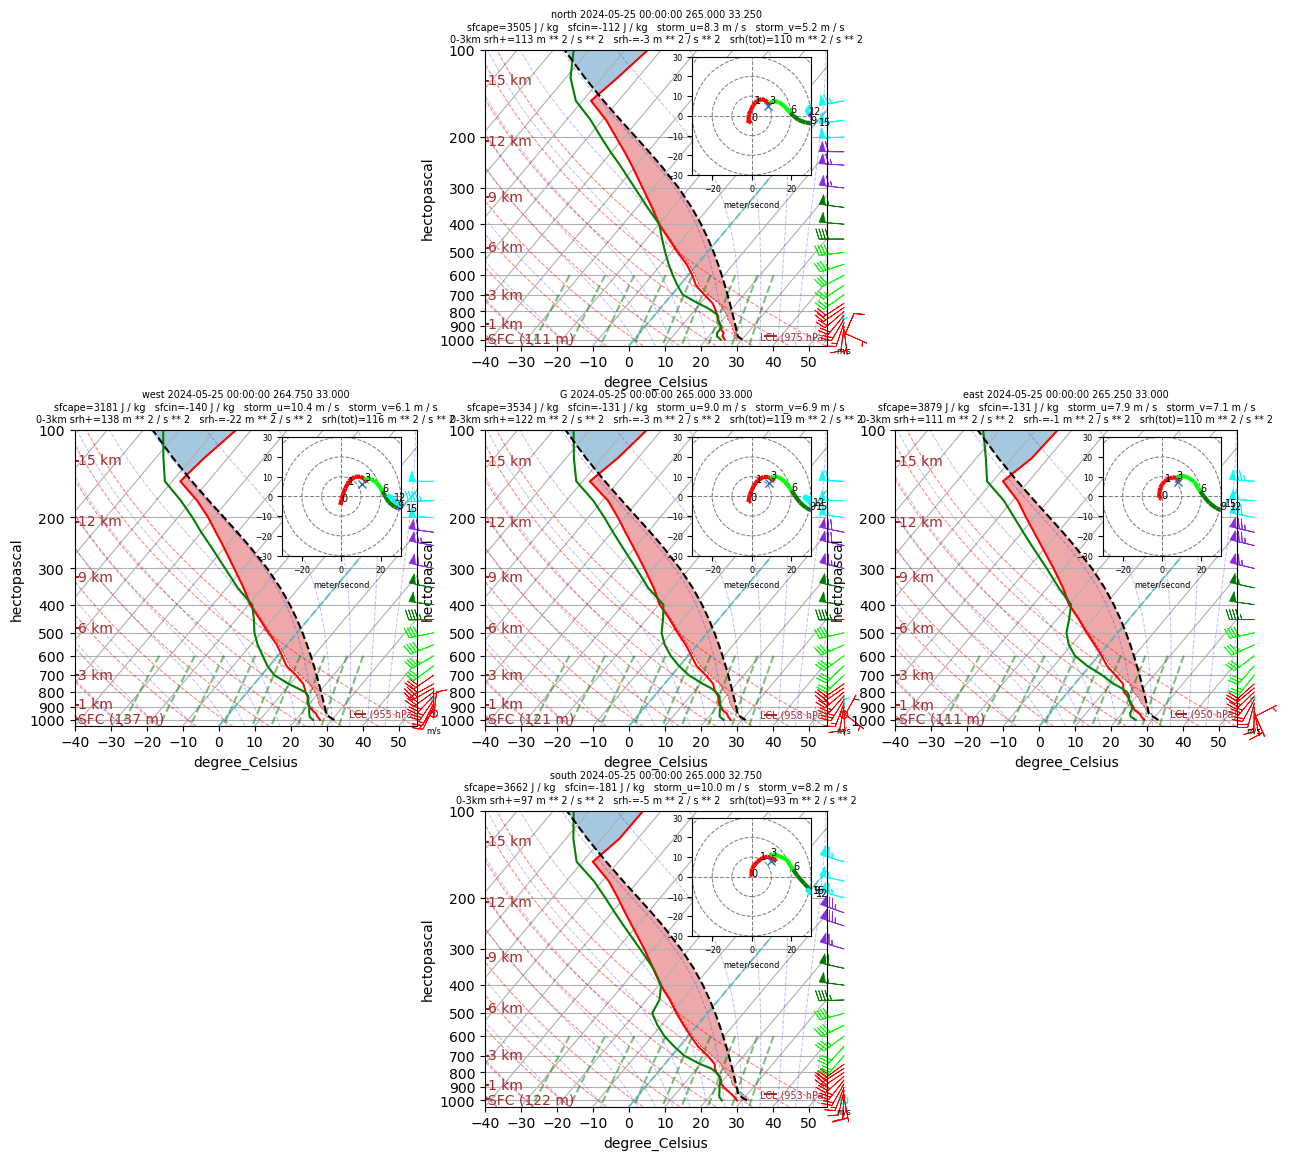

In [4]:
ds0 = cm1.input.era5.model_level(valid_time).load()
#ds0 = cm1.input.era5.aws(valid_time)

isel = cm1.input.era5.nearest_grid_neighbors(ds0, lat=lat, lon=lon)
fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15, 14))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

dss = {}
for k, v in isel.items():
    if k == "G":
        i = 5
    elif k == "north":
        i = 2
    elif k == "south":
        i = 8
    elif k == "west":
        i = 4
    elif k == "east":
        i = 6
    else:
        raise ValueError(f"Unknown value {v}")
    if v is not None:
        ds = ds0.isel(v)
        dss[k] = ds
        print(f"{k}: {ds.latitude.values}, {ds.longitude.values}")
        skew = skewt(ds, fig=fig, subplot=(3, 3, i))
        skew.ax.set_title(f"{k} {skew.ax.get_title()}", fontsize="x-small")
        ofile = TMPDIR / f"{skew.ax.get_title().split('\n')[0].replace(' ','_')}.txt"
        with open(ofile, "w") as f:
            f.write(cm1.input.sounding.to_txt(ds))
            logging.warning(ofile)

In [5]:
ds0

<xarray.Dataset> Size: 959MB
Dimensions:                        (longitude: 1440, latitude: 721, level: 37)
Coordinates:
  * longitude                      (longitude) float64 12kB 0.0 0.25 ... 359.8
  * latitude                       (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/16)
    Q                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'dimensionless')...
    T                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'kelvin')...
    U                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter / second')...
    V                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter / second')...
    W                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'pascal / second')...
    Z                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<truediv, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter')...
    ...                             ...
    VAR_2T                         (latitude, longitude) float32 4MB <Quantit...
    VAR_2D                         (latitude, longitude) float32 4MB <Quantit...
    surface_potential_temperature  (latitude, longitude) float32 4MB <Quantit...
    surface_mixing_ratio           (latitude, longitude) float32 4MB <Quantit...
    Zsfc                           (latitude, longitude) float32 4MB <Quantit...
    LSM                            (latitude, longitude) float32 4MB <Quantit...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

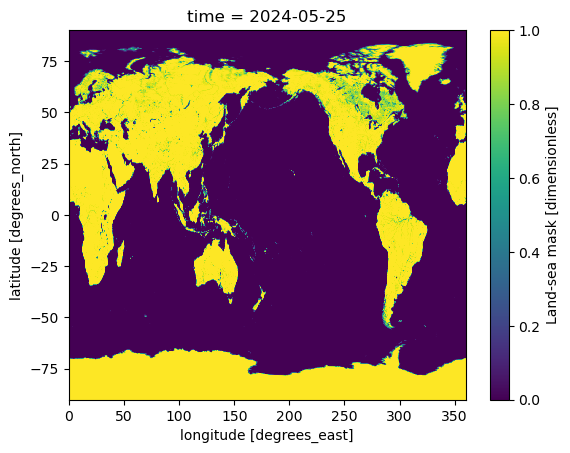

In [8]:
invariant = cm1.input.era5.invariant() if "LSM" not in ds0 else ds0
invariant.LSM.plot()

In [9]:
from io import StringIO

s = cm1.input.sounding.to_txt(dss["G"])
print(s)
pd.read_csv(StringIO(s), skiprows=1, sep=" ", names=["Z", "theta", "Q", "U", "V"])

992.9303125 301.0862121582031 20.30569839477539
59.748398 299.96044921875 19.766842 0.019332886 -2.007187
282.11118 300.700120400022 18.14798 -1.5965881 -2.9256134
511.08325 301.80498317937906 17.750298 -1.0050659 0.7854004
744.93054 302.0858882830203 17.431293 -0.06703186 2.820877
983.8162 303.1453620719813 17.231976 1.0405884 5.33963
1228.2896 304.18987452999113 16.718836 3.0754395 8.131653
1478.7128 305.73983083680923 16.230198 6.0392914 9.869232
1735.7816 307.2194676954493 15.69345 8.607178 9.722153
1999.3607 308.2052574784325 14.4653425 10.4969635 8.753311
2269.6453 309.5881553184888 12.687152 11.310379 7.7236633
2547.2932 311.22711754721655 10.660355 10.866577 7.551056
3125.5994 312.84530039637406 7.610748 9.631577 9.053513
3735.2942 314.20336664436144 5.765448 10.844574 10.320648
4383.6636 317.1497856553079 4.4353123 13.457092 9.879715
5078.211 320.202151866144 3.5035052 16.701996 7.6543884
5825.6826 322.9135846455647 2.8745036 19.234695 4.4019775
6635.7427 326.18038992098326 2.

,Z,theta,Q,U,V
0,59.748398,299.960449,19.766842,0.019333,-2.007187
1,282.111180,300.700120,18.147980,-1.596588,-2.925613
2,511.083250,301.804983,17.750298,-1.005066,0.785400
3,744.930540,302.085888,17.431293,-0.067032,2.820877
4,983.816200,303.145362,17.231976,1.040588,5.339630
5,1228.289600,304.189875,16.718836,3.075439,8.131653
6,1478.712800,305.739831,16.230198,6.039291,9.869232
7,1735.781600,307.219468,15.693450,8.607178,9.722153
8,1999.360700,308.205257,14.465343,10.496963,8.753311
9,2269.645300,309.588155,12.687152,11.310379,7.723663


## Show difference between pressure-level and model level soundings
* fewer pressure levels than model levels
* winds at surface (10u and 10v) not in pressure-level sounding

2025-02-13 11:37:27,899 - WARNING: some Td > T
2025-02-13 11:37:34,396 - WARNING: some Td > T


Text(0.5, 1.0, 'model level  2024-05-25 00:00:00 265.000 33.000\nsfcape=3534 J / kg   sfcin=-131 J / kg   storm_u=9.0 m / s   storm_v=6.9 m / s\n0-3km srh+=122 m ** 2 / s ** 2   srh-=-3 m ** 2 / s ** 2   srh(tot)=119 m ** 2 / s ** 2')

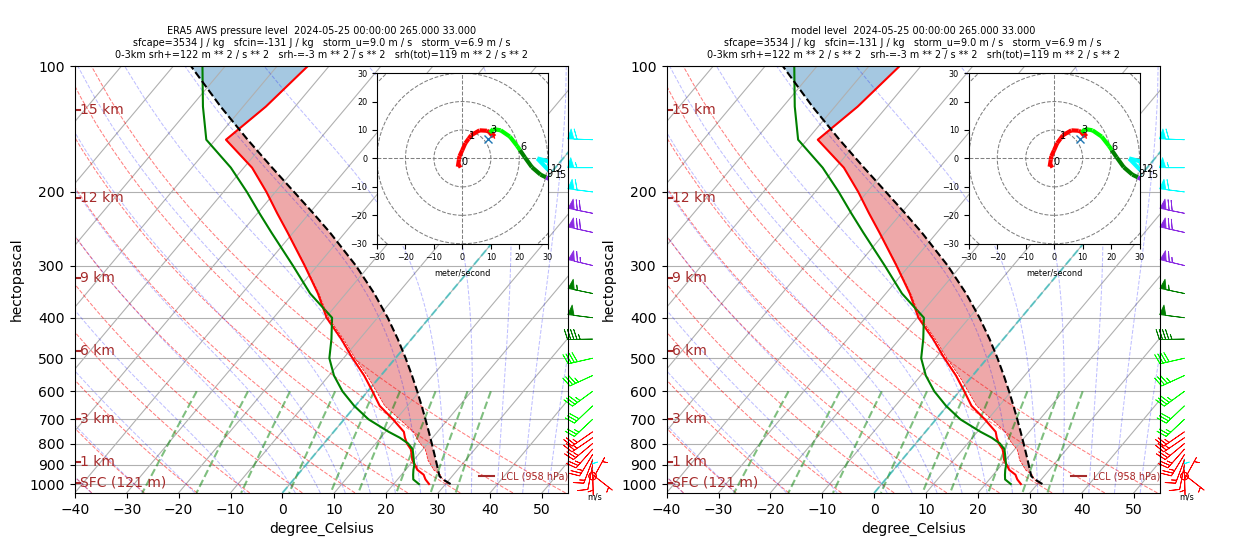

In [10]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(14, 7))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")
skew = skewt(ds_aws, fig=fig, subplot=(1, 2, 1))
skew.ax.set_title(f"ERA5 AWS pressure level  {skew.ax.get_title()}", fontsize="x-small")
skew = skewt(ds0.isel(isel["G"]), fig=fig, subplot=(1, 2, 2))
skew.ax.set_title(f"model level  {skew.ax.get_title()}", fontsize="x-small")

In [11]:
cm1.input.sounding.to_txt(ds_aws)

'992.9303125 301.0862121582031 20.30569839477539\n59.748398 299.96044921875 19.766842 0.019332886 -2.007187\n282.11118 300.700120400022 18.14798 -1.5965881 -2.9256134\n511.08325 301.80498317937906 17.750298 -1.0050659 0.7854004\n744.93054 302.0858882830203 17.431293 -0.06703186 2.820877\n983.8162 303.1453620719813 17.231976 1.0405884 5.33963\n1228.2896 304.18987452999113 16.718836 3.0754395 8.131653\n1478.7128 305.73983083680923 16.230198 6.0392914 9.869232\n1735.7816 307.2194676954493 15.69345 8.607178 9.722153\n1999.3607 308.2052574784325 14.4653425 10.4969635 8.753311\n2269.6453 309.5881553184888 12.687152 11.310379 7.7236633\n2547.2932 311.22711754721655 10.660355 10.866577 7.551056\n3125.5994 312.84530039637406 7.610748 9.631577 9.053513\n3735.2942 314.20336664436144 5.765448 10.844574 10.320648\n4383.6636 317.1497856553079 4.4353123 13.457092 9.879715\n5078.211 320.202151866144 3.5035052 16.701996 7.6543884\n5825.6826 322.9135846455647 2.8745036 19.234695 4.4019775\n6635.7427 326

In [12]:
ds = cm1.input.sounding.era5_pressure_level(valid_time, lat, lon)
ds

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/glade/campaign/collections/rda/data/d633000/e5.oper.an.pl/202405/e5.oper.an.pl.128_129_z.ll025sc.2024052500_2024052523.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
skewt(ds)

In [ ]:
invariant